In [89]:
import pandas as pd

# load the metrics
vit_ensemble = pd.read_csv("vit_ensemble_metrics_stack.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics_stack.csv")
vit_base_16 = pd.read_csv("vit_base_16_metrics_stack.csv")

In [90]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.807924,0.787888
std,0.001816,0.001955
min,0.805419,0.784703
25%,0.806428,0.786228
50%,0.807870,0.787939
75%,0.809167,0.789233
max,0.811185,0.791813


In [91]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.816671,0.780537
std,0.002495,0.002615
min,0.810897,0.774040
25%,0.814860,0.779081
50%,0.817383,0.780835
75%,0.818175,0.782143
max,0.822427,0.786583


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Accuracy of Models')

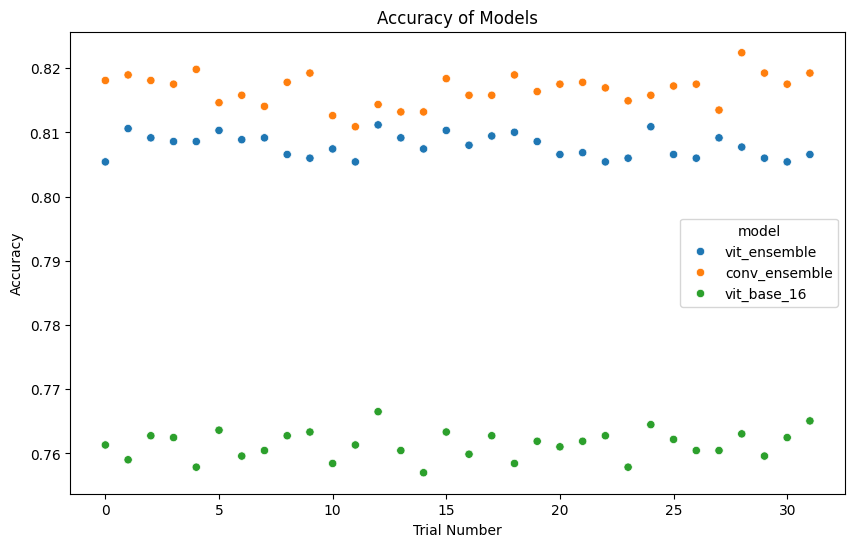

In [93]:
all_metrics = pd.concat(
    [
        vit_ensemble,
        conv_ensemble,
        vit_base_16,
    ],
    axis=0,
)


all_metrics["model"] = (
    ["vit_ensemble"] * vit_ensemble.shape[0]
    + ["conv_ensemble"] * conv_ensemble.shape[0]
    + ["vit_base_16"] * vit_base_16.shape[0]
)

all_metrics


plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="model")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")

Text(0.5, 1.0, 'Accuracy of Models')

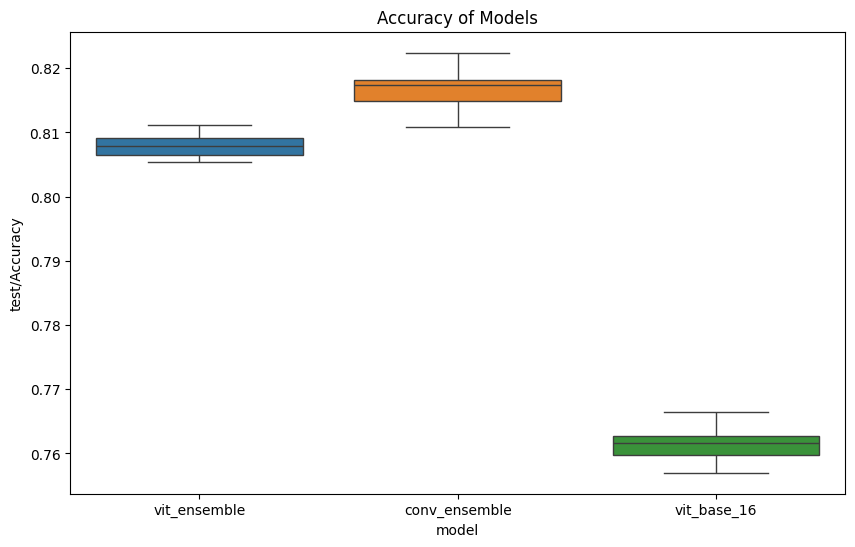

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_metrics, x="model", y="test/Accuracy", hue="model")
plt.title("Accuracy of Models")

Text(0.5, 1.0, 'Balanced Accuracy of Models')

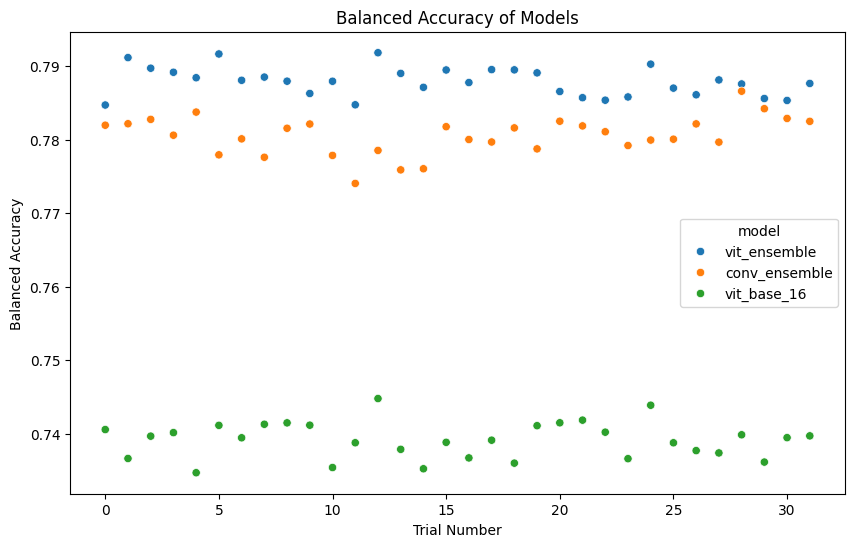

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="model"
)

plt.xlabel("Trial Number")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of Models")

Text(0.5, 1.0, 'Balanced Accuracy of Models')

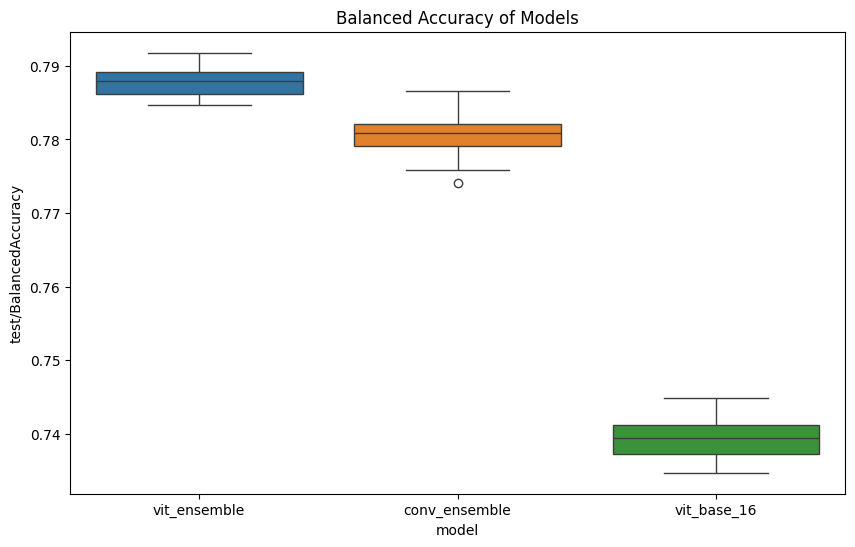

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_metrics, x="model", y="test/BalancedAccuracy", hue="model")
plt.title("Balanced Accuracy of Models")

# Statistical Testing for the Mean of a Normal Distribution of the response variable

Text(0.5, 1.0, 'VIT Base 16 Balanced Accuracy QQ Plot')

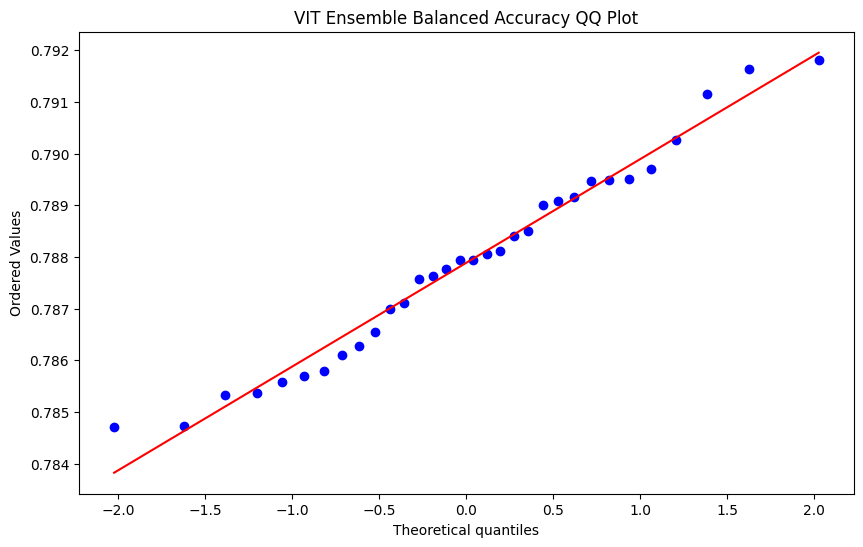

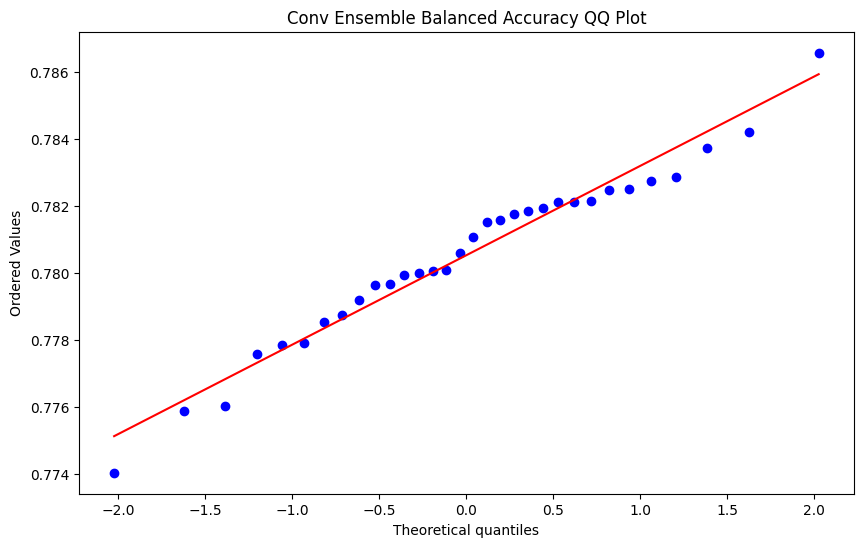

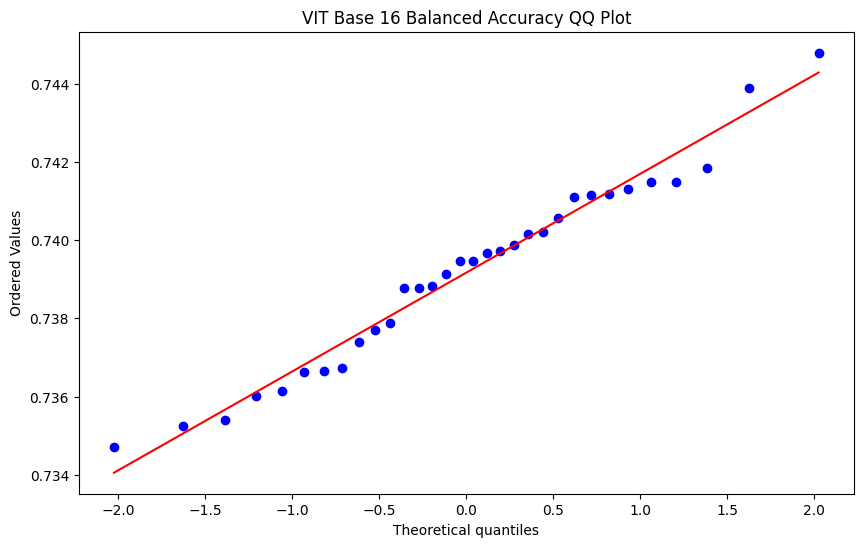

In [97]:
import scipy.stats as stats

alpha = 0.05
# we use the qq plots to check if data is normally distributed

plt.figure(figsize=(10, 6))
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Ensemble Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Conv Ensemble Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 16 Balanced Accuracy QQ Plot")

## Normality Assumption using the Shapiro-Wilk Test

In [98]:
def check_normality(df: pd.DataFrame, name: str):
    print(f"-Checking normality for {name} using Shapiro-Wilk Tests- alpha {alpha}")
    shapiro_stat, shapiro_p = stats.shapiro(df["test/BalancedAccuracy"])
    print(f"Shapiro Statistic: {shapiro_stat}")
    print(f"Shapiro P Value: {shapiro_p}")
    print()
    if shapiro_p < alpha:
        print(f"The data {name} is not normally distributed")
    else:
        print(f"The data {name} is normally distributed")
    print()
    return shapiro_stat, shapiro_p


shapiros = {}
shapiros["vit_ensemble"] = check_normality(vit_ensemble, "VIT Ensemble")
shapiros["conv_ensemble"] = check_normality(conv_ensemble, "Conv Ensemble")
shapiros["vit_base_16"] = check_normality(vit_base_16, "VIT Base 16")
shapiros = pd.DataFrame(shapiros, index=["shapiro_stat", "shapiro_p"]).T
shapiros

-Checking normality for VIT Ensemble using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.9689071397528256
Shapiro P Value: 0.4697932027492762

The data VIT Ensemble is normally distributed

-Checking normality for Conv Ensemble using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.975314236988187
Shapiro P Value: 0.6566168728405842

The data Conv Ensemble is normally distributed

-Checking normality for VIT Base 16 using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.973891761094334
Shapiro P Value: 0.6129215517764093

The data VIT Base 16 is normally distributed



,shapiro_stat,shapiro_p
vit_ensemble,0.968907,0.469793
conv_ensemble,0.975314,0.656617
vit_base_16,0.973892,0.612922


## Levene Test for Homogeneity of Variance

In [99]:
# Levene test is for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
)
print(f'-Levene Test- alpha {alpha}')
print(f"Levene Stat: {levene_stat}")
print(f"Levene p-value: {levene_p}")
if levene_p < alpha:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

-Levene Test- alpha 0.05
Levene Stat: 1.0034989962104799
Levene p-value: 0.37052875171880056
The variances are equal


## ANOVA Test for the Mean of a Normal Distribution

In [100]:
# ANOVA test
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
)

print(f"-ANOVA Test- alpha {alpha}")
print(f"F Statistic: {fvalue}")
print(f"P Value: {pvalue}")
if pvalue < alpha:
    print("Reject the null hypothesis, the means are not equal")
    print(
        "There is a significant difference between the models in terms of balanced accuracy"
    )
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print(
        "There is no significant difference between the models in terms of balanced accuracy"
    )

-ANOVA Test- alpha 0.05
F Statistic: 3958.3291548817715
P Value: 1.0385002192996134e-90
Reject the null hypothesis, the means are not equal
There is a significant difference between the models in terms of balanced accuracy


## Tukey's HSD Test for Multiple Comparisons

In [101]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# we can use Tukey's HSD test to find out which models are different

# the tukeyhsd test performs multiple pairwise comparisons using the studentized range distribution with

m_comp = pairwise_tukeyhsd(
    all_metrics["test/BalancedAccuracy"], all_metrics["model"], alpha=alpha / 3
)

print(m_comp)


      Multiple Comparison of Means - Tukey HSD, FWER=0.02      
    group1       group2    meandiff p-adj lower   upper  reject
---------------------------------------------------------------
conv_ensemble  vit_base_16  -0.0414   0.0 -0.043 -0.0397   True
conv_ensemble vit_ensemble   0.0074   0.0 0.0057   0.009   True
  vit_base_16 vit_ensemble   0.0487   0.0 0.0471  0.0504   True
---------------------------------------------------------------
